# Introduction to Network Analysis

---

[Dataset Link](http://www-personal.umich.edu/~mejn/netdata/)

## Introduction

- What is a network? 

- Examples

 - How is a network defined?
 - It's not just the elements of a system but how they are put together. 
 
 - Directed vs UnDirected Ties
 - Strength of a Tie
 - Walks, Trails and Paths
 - Length and Distance
 - Independent Paths
 - Cutpoints
 - Bridges
 - Connectivity
 - Density of a Network
 - Average distance 
 - Centralization
 - Transitivity
 - Cliques, N-cliques
 - Centrality
 
 



### What are we doing in this tutorial? 

We are looking at examples 

Intro to NetworkX examples. 

Introduce the data 

Ask some questions. 

Use a network to answer them. 


In [1]:
%pylab inline
from __future__ import print_function
import networkx as nx
import sys
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## load the data 

Our data comes from a social network analysis of a karate class. The nodes represent individuals and the ties represent freindships. The data is stored in [gml format](https://en.wikipedia.org/wiki/Graph_Modelling_Language)

In [2]:
Graph_Karate = nx.read_gml('karate.gml', label='id')
Graph_Karate.name = 'SocialCircles_KarateClass'

### Representations of Networks

There are serveral ways to represent networks. 

One of them is an adjacency matrix. An adjacenty matrix is a binary square matrix. Each row represents the connections to other nodes in the network. For instance, the first row represents the first node. The columns represent possible connections to the other nodes as indicated by 1 (connected) or 0 (not connected).  

In [3]:
adj_matrix = nx.adjacency_matrix(Graph_Karate).todense()
np.set_printoptions(threshold=numpy.nan)
print(adj_matrix)

[[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 

Graphs can also be represented as edge lists where list represents connections between nodes 

In [4]:
nx.write_edgelist(Graph_Karate,
                 sys.stdout)

1 32 {}
1 2 {}
1 3 {}
1 4 {}
1 5 {}
1 6 {}
1 7 {}
1 8 {}
1 9 {}
1 11 {}
1 12 {}
1 13 {}
1 14 {}
1 18 {}
1 20 {}
1 22 {}
2 3 {}
2 4 {}
2 8 {}
2 14 {}
2 18 {}
2 20 {}
2 22 {}
2 31 {}
3 4 {}
3 33 {}
3 8 {}
3 9 {}
3 10 {}
3 14 {}
3 28 {}
3 29 {}
4 8 {}
4 13 {}
4 14 {}
5 11 {}
5 7 {}
6 11 {}
6 17 {}
6 7 {}
7 17 {}
9 34 {}
9 33 {}
9 31 {}
10 34 {}
14 34 {}
15 33 {}
15 34 {}
16 33 {}
16 34 {}
19 33 {}
19 34 {}
20 34 {}
21 33 {}
21 34 {}
23 33 {}
23 34 {}
24 33 {}
24 26 {}
24 28 {}
24 34 {}
24 30 {}
25 32 {}
25 26 {}
25 28 {}
26 32 {}
27 34 {}
27 30 {}
28 34 {}
29 32 {}
29 34 {}
30 33 {}
30 34 {}
31 34 {}
31 33 {}
32 34 {}
32 33 {}
33 34 {}


Lastly networks can be represented as Graphs, what we are most familiar with. 

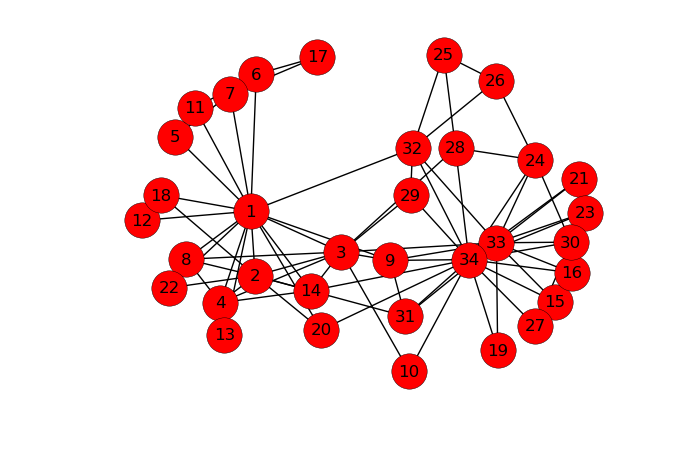

In [5]:
spring_pos = nx.spring_layout(Graph_Karate)
plt.axis("off")
nx.draw_networkx(Graph_Karate,
                pos=spring_pos,
                with_labels = True,
                node_size=650,
                label='Friendship Network')

# Summary Statistics 

Summmary info about the network. We see that there are 34 individuals (nodes) and 78 friendships (edges). The average degree is the average number of edges connecting each node. In this context, each person in the class has on average 4.6 friends.   

In [6]:
print( nx.info(Graph_Karate) )

Name: SocialCircles_KarateClass
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


# Individual Nodes 

## Q: Who has the most friends?

We can cast this as a networks problem by asking which node has the most edges. 

In [19]:
dict_degree = Graph_Karate.degree()
df_degree = pd.DataFrame.from_dict(dict_degree, orient='index')
df_degree.columns=['degree']
df_degree.index.name = 'node_id'

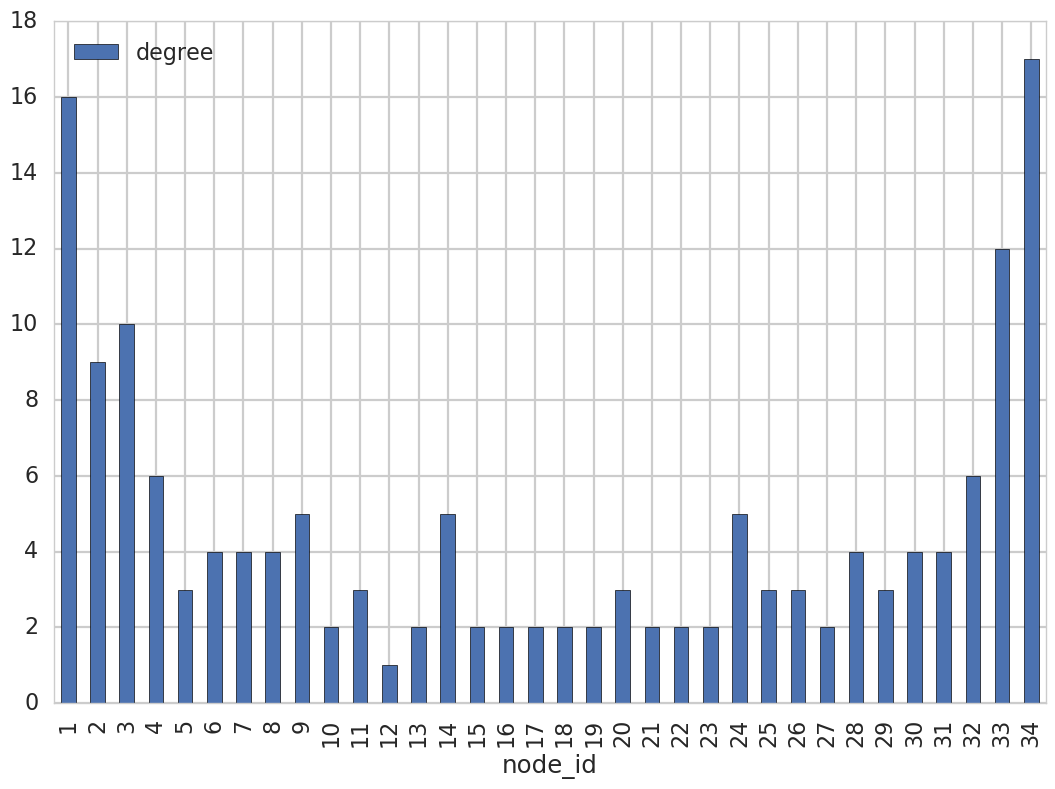

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(22, 12))
sns.set_context("poster", font_scale=1.00, rc={"lines.linewidth": 1.00,"lines.markersize":8})
df_degree.plot(kind='bar')

From this figure we can see that node 1,34 and 33 are the most connected and have the most friendships out of the group. 12 is the only individual that has only one connection. There are a few with 10 friends and the rest have around 2 to 5 friendships in the class. 

# Shortest Paths

The shortest path between two nodes is the smallest set of nodes that you must hop from to get to the other node where you cannot repeat nodes. This can indicate how many people it takes to broker an introduction. Think [six-degrees-of-kevin-bacon](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon)

In [28]:
#shortest path length
ls_path = nx.shortest_path(Graph_Karate, 12,15)
print('The path length from {} to {} is {}.'.format(
                                            12,15,len(ls_path)))
print('path length: ', ls_path)

The path length from 12 to 15 is 5.
path length:  [12, 1, 32, 33, 15]


# Centrality

Centrality metrics measure how important a node is or how "central" it is to the network. This can indicate what individual has to most social contacts, who is closest to the most amount of people, or the person where information most transfers through. 